In [ ]:
//@version=5
indicator("OB/OS Multi-Indicator Dashboard", overlay=false)

// === INPUTS === //
rsiLen    = input.int(14, title="RSI Length")
stochKLen = input.int(14, title="Stochastic %K Length")
stochDSm  = input.int(3, title="Stochastic %D Smoothing")
cciLen    = input.int(20, title="CCI Length")
willrLen  = input.int(14, title="Williams %R Length")
mfiLen    = input.int(14, title="MFI Length")

// === INDICATORS === //
rsi = ta.rsi(close, rsiLen)

stochK = ta.stoch(close, high, low, stochKLen)
stochD = ta.sma(stochK, stochDSm)

cci = ta.cci(close, cciLen)

highestHigh = ta.highest(high, willrLen)
lowestLow   = ta.lowest(low, willrLen)
willr = (highestHigh - close) / (highestHigh - lowestLow) * -100

// MFI (Manual)
typPrice = (high + low + close) / 3
rawMF = typPrice * volume
posMF = typPrice > typPrice[1] ? rawMF : 0
negMF = typPrice < typPrice[1] ? rawMF : 0
sumPosMF = math.sum(posMF, mfiLen)
sumNegMF = math.sum(negMF, mfiLen)
mfiRatio = sumNegMF == 0 ? 100 : sumPosMF / sumNegMF
mfi = 100 - (100 / (1 + mfiRatio))

// === PLOTS === //
// RSI
plot(rsi, title="RSI", color=color.orange, linewidth=2)
hline(70, "RSI OB", color=color.red, linestyle=hline.style_dashed)
hline(30, "RSI OS", color=color.green, linestyle=hline.style_dashed)

// Stochastic
plot(stochK, title="Stochastic %K", color=color.blue)
plot(stochD, title="Stochastic %D", color=color.teal)
hline(80, "Stoch OB", color=color.maroon, linestyle=hline.style_dashed)
hline(20, "Stoch OS", color=color.lime, linestyle=hline.style_dashed)

// CCI
plot(cci, title="CCI", color=color.purple)
hline(100, "CCI OB", color=color.fuchsia, linestyle=hline.style_dashed)
hline(-100, "CCI OS", color=color.aqua, linestyle=hline.style_dashed)

// Williams %R
plot(willr, title="Williams %R", color=color.fuchsia)
hline(-20, "Will %R OB", color=color.red, linestyle=hline.style_dashed)
hline(-80, "Will %R OS", color=color.green, linestyle=hline.style_dashed)

// MFI
plot(mfi, title="MFI", color=color.navy)
hline(80, "MFI OB", color=color.red, linestyle=hline.style_dashed)
hline(20, "MFI OS", color=color.green, linestyle=hline.style_dashed)

// === Background Highlight (Optional Visual Aid) === //
bgcolor(rsi < 30 or stochK < 20 or cci < -100 or willr < -80 or mfi < 20 ? color.new(color.green, 90) : na)
bgcolor(rsi > 70 or stochK > 80 or cci > 100 or willr > -20 or mfi > 80 ? color.new(color.red, 90) : na)


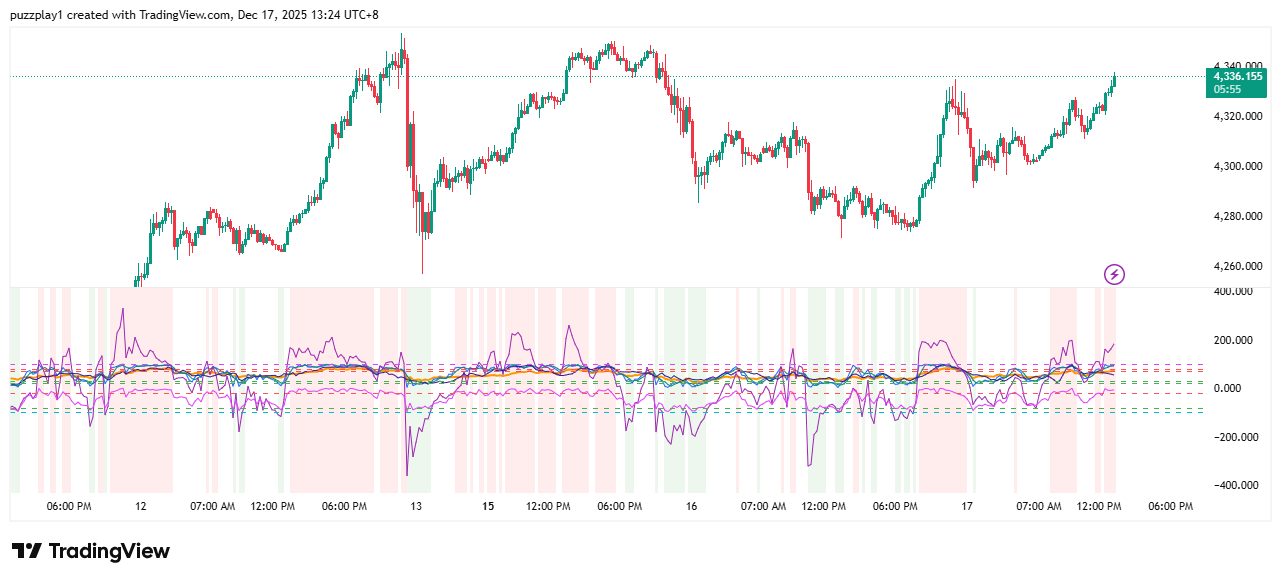